# Positional Encoding
### by Pio Lauren T. Mendoza 2015-04074
This note book creates position
matrix of dimension 16 by 16.

#### Importing modules needed.

In [63]:
import inspect
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

#### Position Matrix
The position matrix $\boldsymbol{P} \in \mathbb{R}^{lxd}$ is as follows:
$$P_{i,2j} = sin(i/10000^{2j/d_k}),$$
$$P_{i,2j+1} = cos(i/10000^{2j/d_k}),$$

where $i = 0,...,l-1$ and $j=0,...,\left\lfloor(d_{k})/2\right\rfloor$
The column vectors from this matrix are added to the 

#### Defining function sines
This function computes for the value of an element of matrix $\boldsymbol{P}$ where sin must be used.

In [3]:
def sines(i, j, dk):
    return np.sin(i/np.power(10000, 2*j/dk))

#### Defining function cosines
This function computes for the value of an element of matrix $\boldsymbol{P}$ where cos must be used.

In [4]:
def cosines(i, j, dk):
    return np.cos(i/np.power(10000, 2*j/dk))

#### Defining the position matrix generator
This functions creates the position matrix.

In [5]:
def createPositionMatrix(l, dk):
    inspect.cleandoc("""
    l is the length of the input sequence/ how many words.
    dk is the dimension of the embedding
    p is the position matrix where each column is a basis.
    """)
    p = np.zeros((l,dk))
    i = np.arange(l) # populating the positions of input sequence.
    j = np.arange(dk//2) # populating the position of the embedding vector dimension.
    ii, jj = np.meshgrid(i,j, indexing="ij") # this acts like a nested for loop
    p[:,0::2] = sines(ii,jj,dk) # operations are vectorized for faster computation
    p[:,1::2] = cosines(ii,jj,dk)
    return p

#### Creating the position matrix 
The length of the sequence will be 16 and the dim of the embedding vector is also 16.

In [6]:
l = 16
dk = 16
P = createPositionMatrix(l,dk)

#### Checking whether the result of the createPositionMatrix is already a set of orthornormal bases.
Checking if normalized - Can be done by checking the dot product of the bases to themselves. Dot product must be 1. <br/>
Checking if orthogonal - Can be done by checking the dot product of the bases with each other except for i = j. Dot product must be 0.

##### Checking Orthogonality

In [25]:
PShifted = P.copy()
# bases are moved to right by 1 and last basis was put in the first column
PShifted = np.concatenate((np.array([PShifted[:,-1]]).T, PShifted), axis=1)[:,:-1] 
# Checking whether some of the bases are othogonal to each other
print(np.sum(P*PShifted, axis=0))

[ 1.93567511 -0.11124568 -0.67522826  1.51110504 -4.57838104  4.99366691
  1.77966783  3.50068495  1.12674279  1.1904306   0.37712422  0.37916984
  0.11992561  0.1199904   0.03794498  0.03794703]


As seen the dot products of some of the bases with one another is not zero therefore they are not orthogonal with one another.
This also means they are not orthonormal with one another.

#### Implementing the Gram-Schmidt Orthogonalization

In [147]:
def gramSchmidt(P):
    inspect.cleandoc("""
    P - input matrix where columns are the bases.
    orthonormalP - output matrix where columns are orthornomal bases.
    """)
    orthonormalP = (P[:, 0]/la.norm(P[:,0]))[:, np.newaxis]
    # iterating over column
    for i in range(1,P.shape[1]):
        # column vector / basis
        x = (P[:, i])[:, np.newaxis]
        # projections
        xDotOrthonormalP = (np.sum(x * orthonormalP, axis = 0))[np.newaxis, :]
        w = np.sum(xDotOrthonormalP * orthonormalP, axis=1)[:, np.newaxis]
        u = x - w
        u /= la.norm(u)
        orthonormalP = np.hstack((orthonormalP, u))
    return np.array(orthonormalP)
def gs(P):
    inspect.cleandoc("""
    P - input matrix where columns are the bases.
    Q - output matrix where columns are orthornomal bases.
    """)
    # built in function for qr decomposition
    q,_ = la.qr(P)
    return q

Getting turning P into as a set of orthonormal bases.

In [148]:
orthonormalP = gramSchmidt(P)

Checking if the vectors are orthogonal with each other.

In [136]:
np.array(orthonormalP).shape

(16, 16)

In [149]:
PShifted = orthonormalP.copy();
# bases are moved to right by 1 and last basis was put in the first column
for it in range(orthonormalP.shape[1]):
    PShifted = np.hstack((np.array([PShifted[:,-1]]).T, PShifted))[:,:-1]
    d = np.sum(orthonormalP*PShifted, axis=0)
    d[d<1e-6] = 0
    print(d)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.99966762 0.
 0.         0.         0.         0.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.99999985 0.99999998 1.         1.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.0260436
 0.99965477 0.         0.         0.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.99999979 0.99999997]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.02586517 0.99965272 0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.  

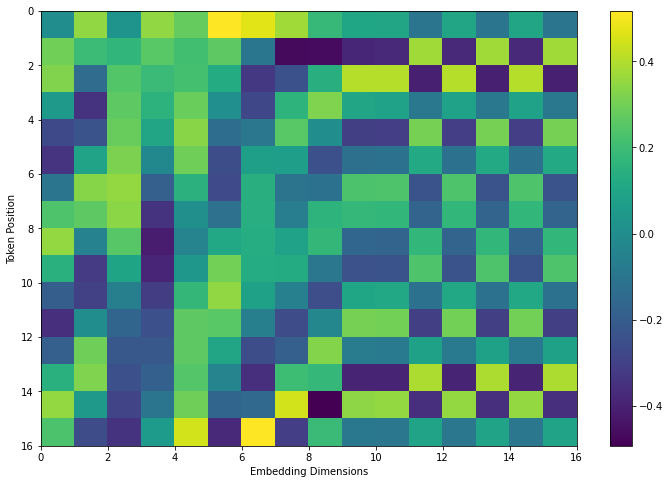

In [150]:
plt.figure(figsize=(12,8))
plt.pcolormesh(orthonormalP, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dk))
plt.ylim((l,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()